# WFDB Tutorial

> Examples of how to work with WFDB files, in the context of the Icentia11k classification problem

In [18]:
import logging
logging.basicConfig(level=logging.INFO)
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wfdb

from ecg_classification.data_loader import Icentia11k

In [19]:
dataset = Icentia11k(Path("../data/icentia11k"))

In [20]:
# Adjust parameters to download additional data
dataset.download(patient_id=900, segments=[18])

INFO:root:p00900_s18.atr already fetched
INFO:root:p00900_s18.hea already fetched
INFO:root:p00900_s18.dat already fetched


In [21]:
rec, ann = dataset.get_recording(patient_id=900, segment=18)

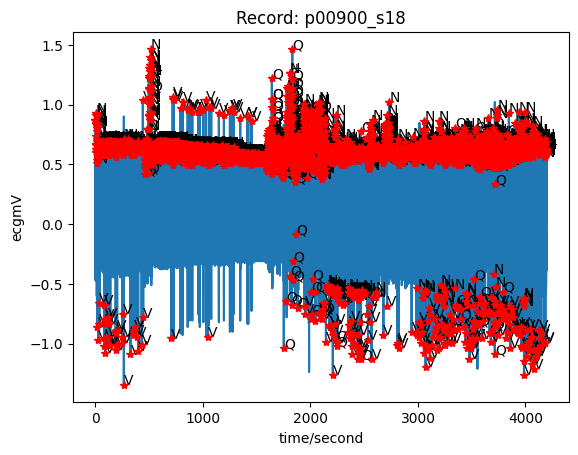

In [22]:
# An example showing a whole segment of data
wfdb.plot_wfdb(rec, ann, plot_sym=True)

## Records

In [23]:
rec

In [24]:
# Show metadata about record
rec.__dict__

{'record_name': 'p00900_s18',
 'n_sig': 1,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1048577,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ecg'],
 'p_signal': array([[-0.09413053],
        [-0.12102496],
        [-0.13447218],
        ...,
        [-0.09413053],
        [-0.10757775],
        [-0.12102496]], shape=(1048577, 1)),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['p00900_s18.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [74.36482269503546],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [16],
 'adc_zero': [0],
 'init_value': [-7],
 'checksum': [65078],
 'block_size': [0]}

In [25]:
# Convert record to numpy array
np_signal = rec.__dict__["p_signal"]
np_signal.shape

(1048577, 1)

## Annotations

In [26]:
ann

In [27]:
ann.__dict__

{'record_name': 'p00900_s18',
 'extension': 'atr',
 'sample': array([    110,     110,     305, ..., 1048203, 1048418, 1048418],
       shape=(5159,)),
 'symbol': ['N',
  '+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'N',
  'V',
  'N',
  'N',
  'V',
  'N',
  'N',
  'V',
  'N',
  'N',
  'V',
  'N',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [28]:
# Heart beat information
set(ann.symbol)

{'+', 'N', 'Q', 'S', 'V'}

In [29]:
# Heart rhythm information
set(ann.aux_note)

{'(N', ')', 'None'}

In [39]:
# Sort beat indices according to the frame that they are in
frame_length = 2049
n_frames = len(rec.p_signal) // frame_length
print(n_frames)
frame_boundaries = frame_length * np.arange(1, n_frames+1)
label_frame_boundaries = np.searchsorted(ann.sample, frame_boundaries)

print(ann.sample[:label_frame_boundaries[0]], ann.sample[label_frame_boundaries[0]:label_frame_boundaries[1]])
print(ann.symbol[:label_frame_boundaries[0]], ann.symbol[label_frame_boundaries[0]:label_frame_boundaries[1]])

511
[ 110  110  305  510  708  902 1103 1299 1497 1700 1903] [2100 2298 2500 2703 2904 3015 3121 3315 3502 3696 3886 4083]
['N', '+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'] ['N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N']
